# 07 Create Figures, analyze labels/phases

In [4]:
import nibabel as nib
import os
import numpy as np
import pandas as pd
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from utils import get_mask_fname, find_midz, view_registration_oneslice, view_reg_path_oneslice

pd.options.display.max_columns = None

plt.rcParams.update({'font.size': 16})

# Figure 3/4

Plot 1 column of an example registration

In [ ]:
pid = 'r0qjGxLSUw'  # CHANGE THIS! 5VcthT0eZp, 2F2ATtAD4D, rdKMacoScX, wb6JdAREoP, SxqKvXLTcu
base_dir ='/data/larson2/RCC_dl/data2022/'

# determine which phases we have for the pid
phases = {'arterial', 'delay', 'portven'}
phases = [p for p in phases if os.path.isfile(os.path.join(base_dir, pid, (p+'_reg.nii.gz')))] #make sure registered phase images exist in folder
print('phases:', phases)

# get path for noncon image and its mask
noncon_mask_fname = get_mask_fname(os.path.join(base_dir, pid), "noncon", suffix="_cropped")
noncon = os.path.join(base_dir, pid, 'noncon_cropped.nii.gz')

if os.path.exists(os.path.join(base_dir,pid,noncon_mask_fname)):
    noncon_mask = os.path.join(base_dir, pid, noncon_mask_fname)    
    nc_mask_img = nib.load(noncon_mask).get_fdata()
    # find center, min and max of tumor in z
    minz, midz, maxz = find_midz(nc_mask_img)
    #print(minz, midz, maxz)

In [ ]:
phase = phases[0]
print(phase)

# for phase get registered and not registered
phase_mask_fname_reg = get_mask_fname(os.path.join(base_dir, pid), phase, suffix="_reg")
phase_reg = os.path.join(base_dir, pid, (phase +'_reg.nii.gz'))

phase_mask_fname = get_mask_fname(os.path.join(base_dir, pid), phase)
phase = os.path.join(base_dir, pid, (phase +'.nii.gz'))

view_reg_path_oneslice(noncon, phase_reg, phase, [midz, midz])

# Figure 5 & 6
analysis of renal lesion labels and phases per exam

In [ ]:
# load in PIDs we are interested in

pids = pd.read_pickle("pids_registered_final_07182024.pkl").values.T.tolist()[0]
print(len(pids))
print(pids)

572
['0MPL7wuVkw', '0cb2z7Hao2', '0qtu3yMgoH', '0uEjscJHnb', '13Dvlj0sae', '149oqm3Ngv', '1AscaGPb3A', '1T38wBR6vx', '1dDpPTkhGt', '1sb6GNzkwo', '24EKVgU2Oa', '2F2ATtAD4D', '2p0YeE6Epp', '2pAVprZ7PU', '33JkPNZHOn', '34jxhEPOGB', '3Ag6p0hB24', '3LYUFVSwiY', '3aLkePWRfq', '3aYIo3eHeN', '475HQrHo5Y', '4EE43B44hG', '4ycNInAFKz', '53bZsQpbUX', '5J8adAR36L', '5UYwSLaGJ6', '5VcthT0eZp', '5ZBLcJRo6p', '5a1Avs4klU', '5ib8uWd5du', '5s1Tf2blEc', '5vUM50Qb0y', '67dOzUc2Fv', '6NoqPhSMZO', '6RG177cQ1W', '6S3AR8Qv8n', '6Trbnd90hn', '6X72bRxwln', '7DR2PsbosF', '7I8VYuMftc', '8Gj1kgX1lm', '8IAFkRyNZq', '8zMkpkPql6', '9Aue4ckfn8', '9HfCE4O3AQ', '9Qet8yGJkF', '9kW3sAZLvn', '9zuctMrDLy', 'AQ6Cn9ZqIQ', 'AkUL2kzSvF', 'Ao4uzVcMVh', 'B3uXUCxmk3', 'B8RtzXHVC1', 'BkyH8Gio3I', 'BtFicKWjri', 'BwvEvPYeEp', 'CPYZ4YesLX', 'CVDypT1BlX', 'Cwg6Hv9E0n', 'D9c8dq3n6V', 'DRjiVK0IUR', 'Di7ARaJ8S6', 'DwCPMAGbRc', 'E0WBTXpFN9', 'EJ0l52cV1a', 'EWGhhnFjtu', 'EyphhByKpf', 'F0aRdCYAVM', 'FVSEJi1E9U', 'Foki9nKhre', 'GEhrFN1lab', '

In [ ]:
# combine with label info from RedCap

anon_labels=pd.read_excel("/working/larson2/ssahin/rcc_dl/spreadsheets/sage_all.xlsx",  engine='openpyxl') 
anon_labels.drop_duplicates(subset="Anon MRN", inplace=True)

anon_labels = anon_labels[["Orig MRN", "Anon MRN", "Orig Acc #"]]
anon_labels.rename(columns={"Orig MRN": "mrn"}, inplace=True)

df_labels=pd.read_csv("/data/larson2/RCC_dl/metadata/RenalMass_RedCap_Backup_2022-06-27_0933.csv") #has ~988 with labels

df_labels.dropna(subset=["accession", "tumor_type", "pathology"], inplace=True)
df_labels.drop_duplicates(subset="mrn", inplace=True)

df_labels = pd.merge(df_labels, anon_labels, how='outer', on='mrn', validate="1:1")

df_labels_pids = df_labels.loc[df_labels["Anon MRN"].isin(pids)]
df_labels_pids = df_labels_pids[['Anon MRN', 'tumor_type', 'pathology', 'grade', 'diamter', 'size']] #only keep columns of interest 
updated_pids = df_labels_pids["Anon MRN"].values.T.tolist()
print(len(updated_pids))

572


Counter({0.0: 455, 1.0: 63, 3.0: 26, 2.0: 20, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0

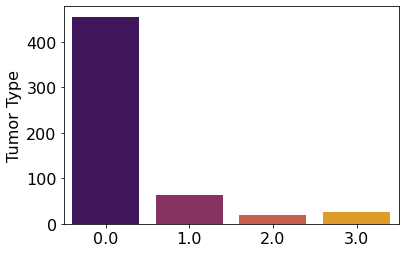

{6.0: 40, 2.0: 255, 3.0: 98, 1.0: 45, 4.0: 16, 5.0: 3}


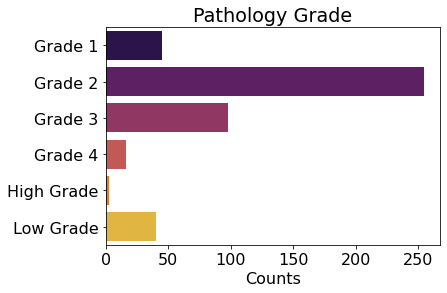

In [ ]:
# plot: tumor type and pathology grade

tumor_types = df_labels_pids["tumor_type"].values.T.tolist()
pathologies = df_labels_pids["pathology"].values.T.tolist()
df2=df_labels_pids.dropna(subset=["grade"])
pathology_grades = df2["grade"].values.T.tolist()

print(Counter(tumor_types))
print(tumor_types)

df = pd.DataFrame.from_dict(dict(Counter(tumor_types).most_common(5)), orient='index', columns=['Tumor Type'])
#df2 = pd.DataFrame.from_dict(list(Counter(tumor_types).items()))
print(df.index)
sns.barplot(x=df.index, y=df["Tumor Type"], palette="inferno")
plt.show()

path_grade_counter = dict(Counter(pathology_grades))
print(path_grade_counter)
path_grade_counter["Grade 1"] = path_grade_counter[1.0]
path_grade_counter["Grade 2"] = path_grade_counter[2.0]
path_grade_counter["Grade 3"] = path_grade_counter[3.0]
path_grade_counter["Grade 4"] = path_grade_counter[4.0]
path_grade_counter["High Grade"] = path_grade_counter[5.0]
path_grade_counter["Low Grade"] = path_grade_counter[6.0]
del path_grade_counter[1.0]
del path_grade_counter[2.0]
del path_grade_counter[3.0]
del path_grade_counter[4.0]
del path_grade_counter[5.0]
del path_grade_counter[6.0]

df = pd.DataFrame.from_dict(path_grade_counter, orient='index', columns=['Pathology Grade'])
sns.barplot(y=df.index, x=df["Pathology Grade"], orient='h', palette="inferno")
plt.xlabel("Counts")
plt.title("Pathology Grade")
plt.show()


In [ ]:
# clean up pathologies before plotting

path_counter = Counter(pathologies)
path_counter["unknown"] = path_counter[np.nan]
del path_counter[np.nan]
path_counter["clear cell"] = path_counter["clear cell"] + path_counter["clear cell, granular variant"]
del path_counter["clear cell, granular variant"]
path_counter['oncocytoma'] = path_counter['oncocytoma'] +1
del path_counter['oncoctyoma']
path_counter['cystic, malignant'] = path_counter['cystic'] + path_counter['cystic nephroma'] + path_counter['multilocular cystic'] + path_counter['multiloculated cyst'] + path_counter['multilocular cyst']
del path_counter['cystic']
del path_counter['cystic nephroma']
del path_counter['multilocular cystic']
del path_counter['multiloculated cyst'] 
del path_counter['multilocular cyst']
path_counter['renal cell carcinoma, NOS'] = path_counter['renal cell carcinoma, NOS'] + path_counter['renal cell carcinoma NOS'] + path_counter['renal cell carncinoma, NOS'] + path_counter['RCC, low grade unclassified'] 
del path_counter['renal cell carcinoma NOS']
del path_counter['renal cell carncinoma, NOS'] 
del path_counter['RCC, low grade unclassified']
path_counter['clear cell, papillary'] = path_counter['clear cell, papillary'] + path_counter['clear cell papillary'] + path_counter['RCC with clear cell and papillary feature'] + path_counter['clear cell papillary renal tumor'] + path_counter['clear cell and papillary']
del path_counter['clear cell papillary'] 
del path_counter['RCC with clear cell and papillary feature'] 
del path_counter['clear cell papillary renal tumor'] 
del path_counter['clear cell and papillary']

other_keys = ['mucinous tubular and spindle cell carcinoma', 'tubular and spindle cell carcinoma', 'paraganglioma', 'focal scar', 'solitary fibrous tumor', 'collecting duct carcinoma', 'anastomosing hemangioma', 'leiomyoma', 'TFE3 translocation associated', 'TCEB1-mutated', 'carcinoid', 'medullary dysplasia vs prominent medullary pyramid', 'metastatic thyroid carcinoma', 'focal fibrosis', 'arteriovenous malformation; prior hemorrhage with thrombosis', 'mucinous tubular', 'glomus tumor', 'TFE3 translocation-associated']
path_counter["other"] = 0
for key in other_keys:
    path_counter["other"] = path_counter["other"] + path_counter[key]
    del path_counter[key]

print(path_counter)


Counter({'clear cell': 342, 'oncocytoma': 63, 'papillary': 61, 'chromophobe': 26, 'angiomyolipoma': 20, 'other': 19, 'renal cell carcinoma, NOS': 10, 'cystic, malignant': 10, 'unknown': 8, 'clear cell, papillary': 7, 'simple cyst': 6})


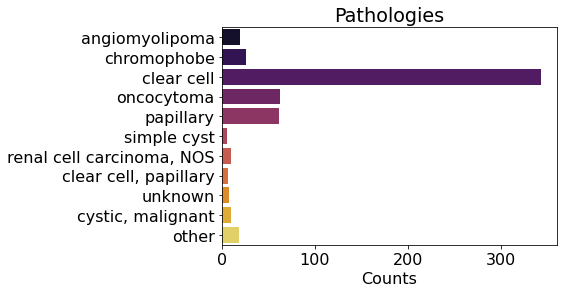

In [ ]:
# plot pathologies
df = pd.DataFrame.from_dict(dict(path_counter), orient='index', columns=['Pathology'])
sns.barplot(y=df.index, x=df["Pathology"], orient='h', palette="inferno")
plt.xlabel("Counts")
plt.title("Pathologies")
plt.show()

Text(0.5, 1.0, 'Pathology Grade')

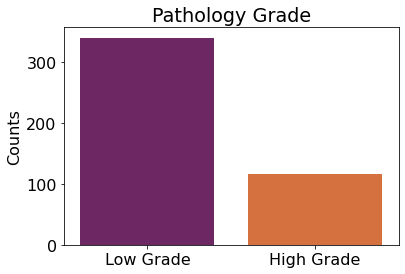

In [ ]:
# compute low vs high grade
low = [1.0, 2.0, 6.0]
hi = [3.0, 4.0, 5.0]
grade_lo_hi = ["Low Grade" if p in low else p for p in pathology_grades]
grade_lo_hi = ["High Grade" if p in hi else p for p in grade_lo_hi]

df = pd.DataFrame.from_dict(dict(Counter(grade_lo_hi)), orient='index', columns=['Low/High Grade'])
sns.barplot(x=df.index, y=df["Low/High Grade"], palette="inferno")
plt.ylabel("Counts")
plt.title("Pathology Grade")

In [ ]:
print(Counter(grade_lo_hi))
print(Counter(pathologies))

Counter({'low': 340, 'high': 117})
Counter({'clear cell': 341, 'oncocytoma': 62, 'papillary': 61, 'chromophobe': 26, 'angiomyolipoma': 20, nan: 8, 'simple cyst': 6, 'renal cell carcinoma, NOS': 6, 'cystic': 3, 'cystic nephroma': 3, 'multilocular cystic': 2, 'renal cell carcinoma NOS': 2, 'TFE3 translocation-associated': 2, 'clear cell, papillary': 2, 'clear cell papillary': 2, 'RCC with clear cell and papillary feature': 1, 'clear cell papillary renal tumor': 1, 'RCC, low grade unclassified': 1, 'glomus tumor': 1, 'mucinous tubular': 1, 'arteriovenous malformation; prior hemorrhage with thrombosis': 1, 'focal fibrosis': 1, 'metastatic thyroid carcinoma': 1, 'multiloculated cyst': 1, 'medullary dysplasia vs prominent medullary pyramid': 1, 'multilocular cyst': 1, 'clear cell, granular variant': 1, 'carcinoid': 1, 'TCEB1-mutated': 1, 'renal cell carncinoma, NOS': 1, 'TFE3 translocation associated': 1, 'leiomyoma': 1, 'anastomosing hemangioma': 1, 'oncoctyoma': 1, 'clear cell and papillar

Phase imgs analysis

In [ ]:
data_path = "/data/larson2/RCC_dl/data2022/"
phase_fname = {"noncon": "noncon_cropped.nii.gz","arterial": "arterial_reg.nii.gz", "delay": "delay_reg.nii.gz", "portven": "portven_reg.nii.gz"}
pixel_sp = []
phase_list = []
phase_combo = []

#pids_fake = ["RclUDEPCYc", "ab4QoMEEcO", "pWfvOWoiHg"]
for pid in tqdm(pids):
    phase_pid = []
    for phase in phase_fname:
        if os.path.exists(os.path.join(data_path,pid,phase_fname[phase])):
            image = nib.load(os.path.join(data_path,pid,phase_fname[phase]))
            pixel_sp.append(image.header["pixdim"][1:4])
            phase_list.append(phase)
            phase_pid.append(phase)
        else:
            if phase == "noncon":
                if os.path.exists(os.path.join(data_path,pid,"noncon.nii.gz")):
                    image = nib.load(os.path.join(data_path,pid,"noncon.nii.gz"))
                    pixel_sp.append(image.header["pixdim"][1:4])
                    phase_list.append(phase)
                    phase_pid.append(phase)
    phase_combo.append(phase_pid)

print(pixel_sp)
print(Counter(map(tuple, pixel_sp)))
print(Counter(phase_list))
print(Counter(map(tuple, phase_combo)))

100%|██████████| 572/572 [00:07<00:00, 72.88it/s]


[array([0.703125, 0.703125, 5.      ], dtype=float32), array([0.7058094 , 0.70374525, 5.006154  ], dtype=float32), array([0.7034464 , 0.70384127, 4.771232  ], dtype=float32), array([0.705, 0.705, 5.   ], dtype=float32), array([0.74858123, 0.743783  , 4.9976563 ], dtype=float32), array([0.7487899 , 0.74245316, 4.9821343 ], dtype=float32), array([0.642578, 0.642578, 2.5     ], dtype=float32), array([0.59022224, 0.5943286 , 2.5115209 ], dtype=float32), array([0.599585 , 0.5927893, 2.5131266], dtype=float32), array([0.703125, 0.703125, 5.      ], dtype=float32), array([0.70350814, 0.70373756, 5.0008173 ], dtype=float32), array([0.703125, 0.703125, 5.      ], dtype=float32), array([0.703125, 0.703125, 5.      ], dtype=float32), array([0.703125, 0.703125, 5.      ], dtype=float32), array([0.59375, 0.59375, 5.     ], dtype=float32), array([0.59375, 0.59375, 5.     ], dtype=float32), array([0.6015625, 0.6015625, 3.       ], dtype=float32), array([0.6015625, 0.6015625, 3.       ], dtype=float32

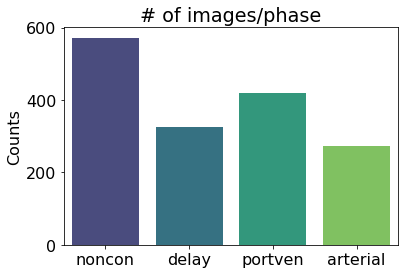

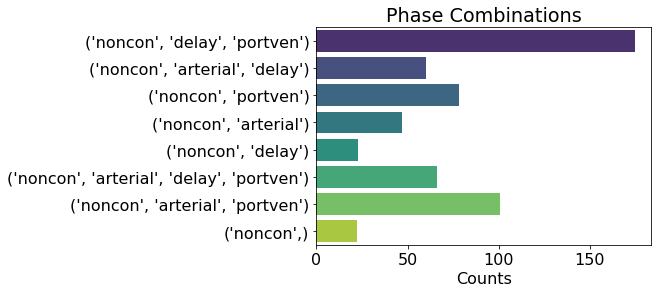

Counter({('noncon', 'delay', 'portven'): 175, ('noncon', 'arterial', 'portven'): 101, ('noncon', 'portven'): 78, ('noncon', 'arterial', 'delay', 'portven'): 66, ('noncon', 'arterial', 'delay'): 60, ('noncon', 'arterial'): 47, ('noncon', 'delay'): 23, ('noncon',): 22})
{'one': 22, 'two': 148, 'three': 336, 'four': 66}


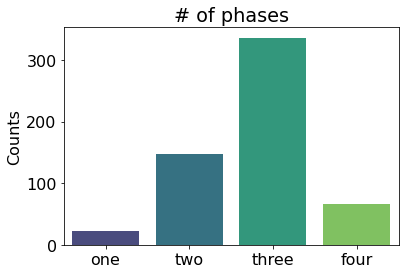

In [ ]:
df = pd.DataFrame.from_dict(Counter(phase_list), orient='index', columns=['# of phases'])
sns.barplot(x=df.index, y=df["# of phases"], palette="viridis")
plt.ylabel("Counts")
plt.title("# of images/phase")
plt.show()

df = pd.DataFrame.from_dict(Counter(map(tuple, phase_combo)), orient='index', columns=['# of phase combos'])
sns.barplot(y=df.index, x=df["# of phase combos"], orient='h', palette="viridis")
plt.xlabel("Counts")
plt.title("Phase Combinations")
plt.show()

phs_ctr = Counter(map(tuple, phase_combo))
print(phs_ctr)
xx = [(len(k),v) for k,v in phs_ctr.items()]
one=0; two=0; three = 0; four = 0
for x in xx:
    if x[0] ==1:
        one += x[1]
    if x[0] ==2:
        two += x[1]
    if x[0] ==3:
        three += x[1]
    if x[0] ==4:
        four += x[1]

phase_nums = {"one": one, "two": two, "three": three, "four": four}
print(phase_nums)

df = pd.DataFrame.from_dict(phase_nums, orient='index', columns=['# of phases'])
sns.barplot(x=df.index, y=df["# of phases"], palette="viridis")
plt.ylabel("Counts")
plt.title("# of phases")
plt.show()

pixel spacings analysis

Counter({0.703125: 110, 0.976562: 69, 0.78125: 55, 0.742188: 54, 0.859375: 25, 0.68359375: 17, 0.781: 16, 0.820312: 16, 0.625: 14, 0.8125: 14, 0.761719: 13, 0.782: 13, 0.875: 12, 0.714844: 11, 0.7421875: 11, 0.822266: 10, 0.8359375: 10, 0.90625: 9, 0.9765625: 9, 0.877: 9, 0.6875: 8, 0.7265625: 8, 0.765625: 8, 0.8671875: 8, 0.861328: 8, 0.8222656: 8, 0.664062: 8, 0.74: 8, 0.64453125: 7, 0.7988281: 7, 0.806641: 7, 0.9375: 7, 0.878906: 7, 0.7441406: 7, 0.734375: 7, 0.7558594: 7, 0.933594: 7, 0.880859: 7, 0.585938: 6, 0.69921875: 6, 0.741: 6, 0.830078: 6, 0.976: 6, 0.845703: 6, 0.798828: 6, 0.7949219: 6, 0.654297: 6, 0.73046875: 6, 0.7910156: 6, 0.732422: 6, 0.816406: 5, 0.675: 5, 0.831: 5, 0.890625: 5, 0.783203: 5, 0.6894531: 5, 0.945312: 5, 0.722656: 5, 0.7480469: 4, 0.833984: 4, 0.6738281: 4, 0.730469: 4, 0.757812: 4, 0.83984375: 4, 0.698: 4, 0.796875: 4, 0.75: 4, 0.837891: 4, 0.8046875: 4, 0.597656: 4, 0.753906: 4, 0.8574219: 4, 0.599609: 4, 0.9511719: 4, 0.816: 4, 0.941406: 4, 0.71875

<AxesSubplot:>

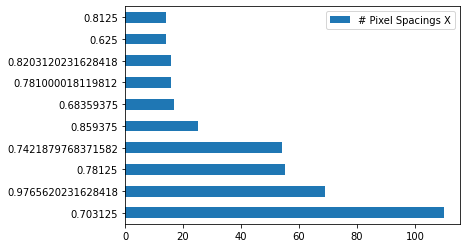

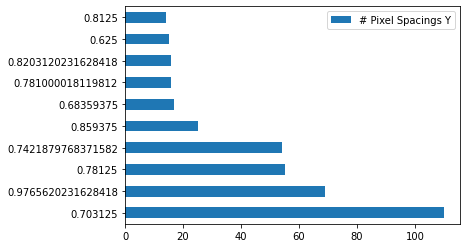

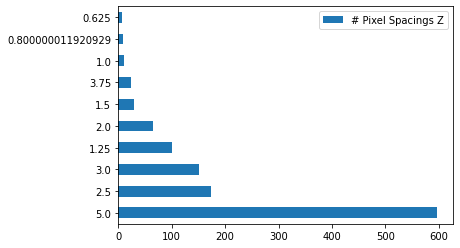

In [ ]:
px_x = [p[0] for p in pixel_sp]
px_y = [p[1] for p in pixel_sp]
px_z = [p[2] for p in pixel_sp]

cx = dict(Counter(px_x).most_common(2))
print(Counter(px_x))
print(Counter(px_y))
print(Counter(px_z))
print(cx)
print(len(px_x))

#xx = [k for k,v in cx.items() if v < 3]
#print(xx)
print("# of scans w pixel spacing in x in b/w 0.7 and 1")
print(len([px for px in px_x if px>=0.7 and px<=1]))
print("# of scans w pixel spacing in x NOT in b/w 0.7 and 1")
print(len([px for px in px_x if px<0.7 or px>1]))
print("# of scans w pixel spacing in y in b/w 0.7 and 1")
print(len([px for px in px_y if px>=0.7 and px<=1]))
print("# of scans w pixel spacing in y NOT in b/w 0.7 and 1")
print(len([px for px in px_y if px<0.7 or px>1]))

print("# of scans w pixel spacing in z in b/w 2 and 3")
print(len([px for px in px_z if px>=2 and px<=3]))
print("# of scans w pixel spacing in z NOT in b/w 2 and 3")
print(len([px for px in px_z if px<2 or px>3]))

df = pd.DataFrame.from_dict(dict(Counter(px_x).most_common(10)), orient='index', columns=['# Pixel Spacings X'])
df.plot.barh()

df = pd.DataFrame.from_dict(dict(Counter(px_y).most_common(10)), orient='index', columns=['# Pixel Spacings Y'])
df.plot.barh()

df = pd.DataFrame.from_dict(dict(Counter(px_z).most_common(10)), orient='index', columns=['# Pixel Spacings Z'])
df.plot.barh()

# New Figures (for paper)

In [74]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import h5py

plt.rcParams.update({'font.size': 16})

## Figure 3

In [39]:
# grab label information from hdf5 files
hdf5_dir = "/data/ssahin/RCC_DL/multiphase/hdf5_dir"

hdf5_files = glob.glob(os.path.join(hdf5_dir, "*.hdf5"))

h5_attrs = []

for file in tqdm(hdf5_files):
    with h5py.File(file, "r") as hdf:
        attrs = {}
        attrs["pathology_grade"] = hdf.attrs["pathology_grade"]
        attrs["pathology"] = hdf.attrs["pathology"]
        attrs["tumor_type"] = hdf.attrs["tumor_type"]
        h5_attrs.append(attrs)

h5_attrs_df = pd.DataFrame(h5_attrs)
h5_attrs_df.head(5)

100%|██████████| 831/831 [00:00<00:00, 2419.94it/s]


,pathology_grade,pathology,tumor_type
0,3.0,clear cell,0.0
1,3.0,clear cell,0.0
2,3.0,clear cell,0.0
3,6.0,"renal cell carcinoma, NOS",0.0
4,1.0,clear cell,0.0


In [66]:
# rename grades for plot
h5_attrs_grades = h5_attrs_df.copy()
h5_attrs_grades["pathology_grade"].replace({1.0: "Grade 1", 2.0: "Grade 2", 3.0: "Grade 3", 4.0: "Grade 4", 5.0: "High Grade", 6.0: "Low Grade"}, inplace=True)
print(h5_attrs_grades.head())

  pathology_grade                  pathology  tumor_type
0         Grade 3                 clear cell         0.0
1         Grade 3                 clear cell         0.0
2         Grade 3                 clear cell         0.0
3       Low Grade  renal cell carcinoma, NOS         0.0
4         Grade 1                 clear cell         0.0


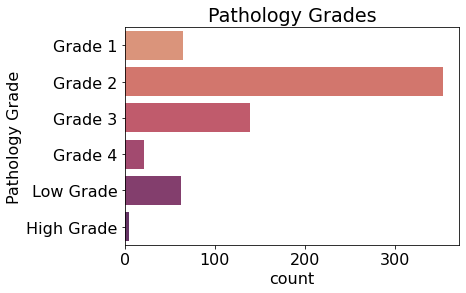

In [75]:
sns.countplot(data=h5_attrs_grades, y="pathology_grade", palette="flare", 
              order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Low Grade", "High Grade"])
plt.ylabel("Pathology Grade")
plt.title("Pathology Grades")
plt.show()

In [76]:
# rename grades for plot
h5_attrs_lohi = h5_attrs_df.copy()
h5_attrs_lohi["pathology_grade"].replace({1.0: "Low Grade", 2.0: "Low Grade", 3.0: "High Grade", 4.0: "High Grade", 5.0: "High Grade", 6.0: "Low Grade"}, inplace=True)
print(h5_attrs_lohi.head())

  pathology_grade                  pathology  tumor_type
0      High Grade                 clear cell         0.0
1      High Grade                 clear cell         0.0
2      High Grade                 clear cell         0.0
3       Low Grade  renal cell carcinoma, NOS         0.0
4       Low Grade                 clear cell         0.0


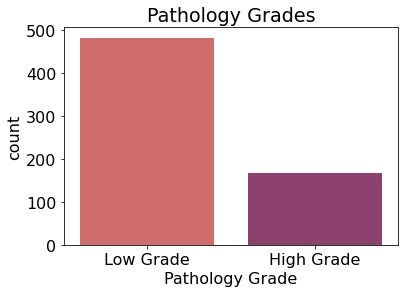

In [79]:
sns.countplot(data=h5_attrs_lohi, x="pathology_grade", palette="flare", 
              order=["Low Grade", "High Grade"])
plt.xlabel("Pathology Grade")
plt.title("Pathology Grades")
plt.show()

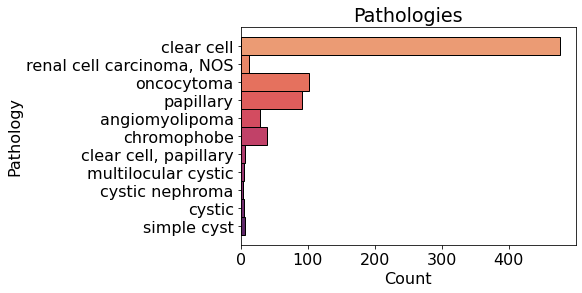

In [78]:
counts = h5_attrs_df["pathology"].value_counts()
h5_attrs_df_mostcommon = h5_attrs_df[h5_attrs_df["pathology"].isin(counts[counts>3].index)]

ax=sns.histplot(h5_attrs_df_mostcommon, y="pathology", discrete=True,
                hue="pathology", palette="flare", alpha=1, legend=False)
plt.ylabel("Pathology")
plt.title("Pathologies")
plt.show()

In [100]:
filepath_phasereg = os.path.join(hdf5_dir, "phase_reg_key.csv")

phase_df = pd.read_csv(filepath_phasereg)
phase_df.drop(columns=["Unnamed: 0", "mask", "pid"], inplace=True)
phase_df.replace({2: 1}, inplace=True)
print(phase_df.head())

   noncon  arterial  delay  portven
0       1         0      1        1
1       1         0      1        1
2       1         1      1        0
3       1         0      0        1
4       1         0      1        1


In [133]:
phase_sums = pd.DataFrame(phase_df.sum(axis=0), columns=["countphase"])
print(phase_sums)

          countphase
noncon           831
arterial         390
delay            484
portven          621


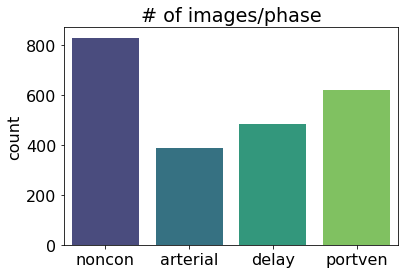

In [134]:
sns.barplot(data=phase_sums, x=phase_sums.index, y="countphase", palette="viridis")
plt.ylabel("count")
plt.title("# of images/phase")
plt.show()

In [135]:
phase_sums = pd.DataFrame(phase_df.sum(axis=1), columns=["numphases"])
print(phase_sums)

     numphases
0            3
1            3
2            3
3            2
4            3
..         ...
826          2
827          2
828          3
829          3
830          3

[831 rows x 1 columns]


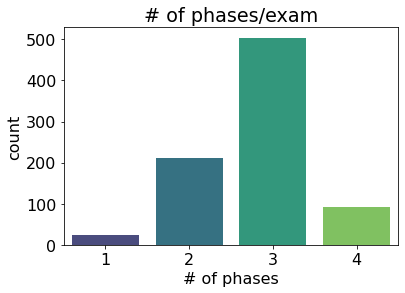

In [137]:
sns.countplot(data=phase_sums, x="numphases", palette="viridis")
plt.xlabel("# of phases")
plt.title("# of phases/exam")
plt.show()

In [127]:
# calculate phase combinations
phases = ["noncon", "arterial", "delay", "portven"]
phase_combo = []

for idx, row in phase_df.iterrows():
    #print(row)
    phase_pid = []
    for phase in phases:
        if row[phase] == 1:
            phase_pid.append(phase)
    phase_combo.append(str(phase_pid).replace("'", ""))

phase_combo_df = pd.DataFrame(phase_combo)
print(phase_combo_df)

                               0
0       [noncon, delay, portven]
1       [noncon, delay, portven]
2      [noncon, arterial, delay]
3              [noncon, portven]
4       [noncon, delay, portven]
..                           ...
826            [noncon, portven]
827            [noncon, portven]
828     [noncon, delay, portven]
829    [noncon, arterial, delay]
830  [noncon, arterial, portven]

[831 rows x 1 columns]


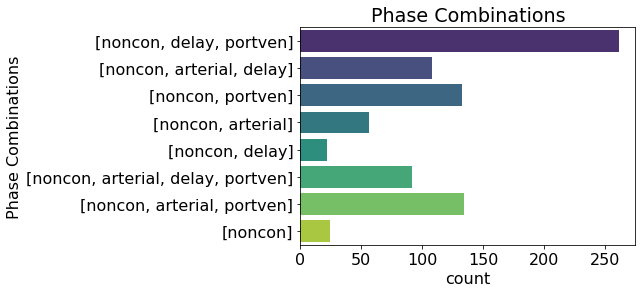

In [131]:
sns.countplot(data=phase_combo_df, y=0, palette="viridis")
plt.ylabel("Phase Combinations")
plt.title("Phase Combinations")
plt.show()